In [1]:
import pandas as pd

In [33]:
df= pd.read_csv("YearPredictionMSD.txt",header = None)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,81,82,83,84,85,86,87,88,89,90
0,2001,49.94357,21.47114,73.07750,8.74861,-17.40628,-13.09905,-25.01202,-12.23257,7.83089,...,13.01620,-54.40548,58.99367,15.37344,1.11144,-23.08793,68.40795,-1.82223,-27.46348,2.26327
1,2001,48.73215,18.42930,70.32679,12.94636,-10.32437,-24.83777,8.76630,-0.92019,18.76548,...,5.66812,-19.68073,33.04964,42.87836,-9.90378,-32.22788,70.49388,12.04941,58.43453,26.92061
2,2001,50.95714,31.85602,55.81851,13.41693,-6.57898,-18.54940,-3.27872,-2.35035,16.07017,...,3.03800,26.05866,-50.92779,10.93792,-0.07568,43.20130,-115.00698,-0.05859,39.67068,-0.66345
3,2001,48.24750,-1.89837,36.29772,2.58776,0.97170,-26.21683,5.05097,-10.34124,3.55005,...,34.57337,-171.70734,-16.96705,-46.67617,-12.51516,82.58061,-72.08993,9.90558,199.62971,18.85382
4,2001,50.97020,42.20998,67.09964,8.46791,-15.85279,-16.81409,-12.48207,-9.37636,12.63699,...,9.92661,-55.95724,64.92712,-17.72522,-1.49237,-7.50035,51.76631,7.88713,55.66926,28.74903


In [34]:
df.shape

(515345, 91)

# Questão 1 - 
Nosso objetivo a ser analisado a partir do dataset (acesse o link nas instruções da prova) é prever o ano em que a música foi produzida. Importe os dados e crie o dataset (utilize pd.read_csv(‘caminho’, header = None). Antes de começar, analise o volume de dados. Feito isso responda a pergunta a seguir: Quantas linhas, colunas e tamanho aproximadamente (em MB) dos nossos dados?

In [35]:
#Rows:515345 \Columns: 90 \Tamanho: 450MB

# Questão 2 - 
Separamos os sets de treinamento e de teste conforme as indicações do site: "You should respect the following train / test split - train: first 463,715 examples / test: last 51,630 examples It avoids the 'producer effect' by making sure no song from a given artist ends up in both the train and test set.".: Após a separação dos dados, qual é o primeiro, último valor, moda e mediana, respectivamente, do conjunto de testes?

In [36]:
train = df.iloc[:463715]
test = df.iloc[463715:]

train.shape,test.shape

((463715, 91), (51630, 91))

In [37]:
test[0].iloc[0],test[0].iloc[-1],int(test[0].mode()),int(test[0].median())

(2007, 2005, 2007, 2002)

# Questão 3 - 
Observe os valores de MAE aplicados nos datasets de treino e teste, adaptando o código abaixo (utilizando as recomendações de separação da questão anterior): # import the libraries import pandas as pd import numpy as np from sklearn.linear_model import LinearRegression from sklearn.metrics import mean_absolute_error # load your data dataset = pd.read_csv('/content/YearPredictionMSD.txt', header=None).to_numpy() # filtereing df X_train = dataset[INSIRA O CÓDIGO AQUI] y_train = np.asarray(dataset[INSIRA O CÓDIGO AQUI) X_test = dataset[INSIRA O CÓDIGO AQUI] y_test = np.asarray(dataset[INSIRA O CÓDIGO AQUI]) # create the model regr = LinearRegression() # training the model regr.fit(X_train, y_train) # evaluating the model print("MAE train set:", mean_absolute_error(y_train,INSIRA O CÓDIGO AQUI)) print("MAE test set:", mean_absolute_error(y_test, INSIRA O CÓDIGO AQUI)) Quais os valores de MAE para o caso de treino e teste, com 6 casas decimais?

In [38]:
# import the libraries 
import pandas as pd 
import numpy as np 
from sklearn.linear_model import LinearRegression 
from sklearn.metrics import mean_absolute_error

In [56]:
# load your data 
##df = pd.read_csv('YearPredictionMSD.txt', header=None).to_numpy() 
# filtereing df 
X_train = train.drop(columns=[0])
y_train = np.asarray(train[0].values) 

In [57]:
X_test = test.drop(columns=[0])
y_test = np.asarray(test[0].values) 

In [60]:
# create the model 
regr = LinearRegression() 

In [61]:
# training the model 
regr.fit(X_train, y_train)

LinearRegression()

In [65]:
y_pred_test = regr.predict(X_test)
y_pred_train = regr.predict(X_train)


In [66]:
# evaluating the model 
print("MAE train set:", mean_absolute_error(y_train,y_pred_train)) 
print("MAE test set:", mean_absolute_error(y_test, y_pred_test))

MAE train set: 6.795570167266231
MAE test set: 6.800496463186955


In [67]:
#Treino: 6.795570 Teste: 6.800496

# Questão 4 - 
Vamos agora tentar usar a expansão polinomial dos features, seguida por uma etapa de features selection. Isso garante que tenhamos todos os features, baseados nos features do problema, para selecionar o melhor e executar um regressor linear. Como não sabemos a priori qual é o número ótimo de features (K), vamos tratar isso como um parâmetro e plotar o MAE para o treinamento e o conjunto de teste como uma variável. Utilizando o código da questão anterior (n°3), adicione o segmento abaixo e analise o gráfico gerado: # import the libraries from sklearn.pipeline import Pipeline from sklearn import feature_selection from sklearn.preprocessing import PolynomialFeatures from sklearn.feature_selection import SelectKBest import gc # setting validation params folds = 12 train_idx = list(KFold(folds, random_state=101, shuffle=True).split(X_train))[0][1] to_plot = [] # training and validating for k_feat in range(50, 2001, 50): gc.collect() print('---------------------------') print("K = ", k_feat) poly = PolynomialFeatures() regr = LinearRegression() f_sel = SelectKBest(feature_selection.f_regression, k=k_feat) pipeline = Pipeline([('poly', poly), ('f_sel', f_sel), ('regr', regr)]) tic = time.perf_counter() pipeline.fit(X_train[train_idx], y_train[train_idx]) print("Training time [s]:", time.perf_counter()-tic) mae_train = mean_absolute_error(y_train[train_idx], pipeline.predict(X_train[train_idx])) mae_test = mean_absolute_error(y_test, pipeline.predict(np.nan_to_num(X_test))) print("MAE train set:", mae_train) print("MAE test set:", mae_test) to_plot.append((k_feat, mae_train, mae_test)) # plotting results plt.plot([x[0] for x in to_plot], [x[1] for x in to_plot], 'b', label='Train') plt.plot([x[0] for x in to_plot], [x[2] for x in to_plot], 'r--', label='Test') plt.xlabel('Num. features selected') plt.ylabel('MAE train/test') plt.legend(loc=0) plt.show() Analisando o gráfico gerado, o melhor valor de K que generaliza nosso problema é aproximadamente ?

In [83]:
# import the libraries 
from sklearn.pipeline import Pipeline 
from sklearn import feature_selection 
from sklearn.preprocessing import PolynomialFeatures 
from sklearn.feature_selection import SelectKBest 
from sklearn.model_selection import KFold
import gc 
import time
import matplotlib.pyplot as plt

In [76]:
# setting validation params 
folds = 12 
train_idx = list(KFold(folds, random_state=101, shuffle=True).split(X_train))[0][1] 
to_plot = [] 


In [89]:
# training and validating 
for k_feat in range(50, 2001, 50): 
    gc.collect() 
    print('---------------------------') 
    print("K = ", k_feat) 
    poly = PolynomialFeatures() 
    regr = LinearRegression() 
    f_sel = SelectKBest(feature_selection.f_regression, k=k_feat) 
    pipeline = Pipeline([('poly', poly), ('f_sel', f_sel), ('regr', regr)]) 
    tic = time.perf_counter() 
    pipeline.fit(X_train.iloc[train_idx], y_train[train_idx]) 
    print("Training time [s]:", time.perf_counter()-tic) 
    mae_train = mean_absolute_error(y_train[train_idx], pipeline.predict(X_train.iloc[train_idx])) 
    mae_test = mean_absolute_error(y_test, pipeline.predict(np.nan_to_num(X_test))) 
    print("MAE train set:", mae_train) 
    print("MAE test set:", mae_test) 
    to_plot.append((k_feat, mae_train, mae_test)) 

---------------------------
K =  50


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:289: RuntimeWarning: divide by zero encountered in divide
  correlation_coefficient /= X_norms
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:358: RuntimeWarning: invalid value encountered in divide
  f_statistic = corr_coef_squared / (1 - corr_coef_squared) * deg_of_freedom


Training time [s]: 2.5340925000000425
MAE train set: 7.216794032937463
MAE test set: 7.175089968026127
---------------------------
K =  100


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:289: RuntimeWarning: divide by zero encountered in divide
  correlation_coefficient /= X_norms
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:358: RuntimeWarning: invalid value encountered in divide
  f_statistic = corr_coef_squared / (1 - corr_coef_squared) * deg_of_freedom


Training time [s]: 2.856852300000355
MAE train set: 7.153420914286551
MAE test set: 7.114260931226086
---------------------------
K =  150


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:289: RuntimeWarning: divide by zero encountered in divide
  correlation_coefficient /= X_norms
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:358: RuntimeWarning: invalid value encountered in divide
  f_statistic = corr_coef_squared / (1 - corr_coef_squared) * deg_of_freedom


Training time [s]: 3.326794300000074
MAE train set: 7.068339343931105
MAE test set: 7.061414527369334
---------------------------
K =  200


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:289: RuntimeWarning: divide by zero encountered in divide
  correlation_coefficient /= X_norms
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:358: RuntimeWarning: invalid value encountered in divide
  f_statistic = corr_coef_squared / (1 - corr_coef_squared) * deg_of_freedom


Training time [s]: 3.291631199999756
MAE train set: 7.021443393137203
MAE test set: 7.0422511221278
---------------------------
K =  250


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:289: RuntimeWarning: divide by zero encountered in divide
  correlation_coefficient /= X_norms
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:358: RuntimeWarning: invalid value encountered in divide
  f_statistic = corr_coef_squared / (1 - corr_coef_squared) * deg_of_freedom


Training time [s]: 3.4951473999999507
MAE train set: 6.9784128387653706
MAE test set: 7.0199844834786544
---------------------------
K =  300


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:289: RuntimeWarning: divide by zero encountered in divide
  correlation_coefficient /= X_norms
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:358: RuntimeWarning: invalid value encountered in divide
  f_statistic = corr_coef_squared / (1 - corr_coef_squared) * deg_of_freedom


Training time [s]: 3.5463368999999147
MAE train set: 6.91862882397508
MAE test set: 6.9703997765396695
---------------------------
K =  350


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:289: RuntimeWarning: divide by zero encountered in divide
  correlation_coefficient /= X_norms
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:358: RuntimeWarning: invalid value encountered in divide
  f_statistic = corr_coef_squared / (1 - corr_coef_squared) * deg_of_freedom


Training time [s]: 3.8783007000001817
MAE train set: 6.889693224948972
MAE test set: 6.957575993566965
---------------------------
K =  400


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:289: RuntimeWarning: divide by zero encountered in divide
  correlation_coefficient /= X_norms
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:358: RuntimeWarning: invalid value encountered in divide
  f_statistic = corr_coef_squared / (1 - corr_coef_squared) * deg_of_freedom


Training time [s]: 3.9920913000000837
MAE train set: 6.86189564461307
MAE test set: 6.939710912503359
---------------------------
K =  450


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:289: RuntimeWarning: divide by zero encountered in divide
  correlation_coefficient /= X_norms
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:358: RuntimeWarning: invalid value encountered in divide
  f_statistic = corr_coef_squared / (1 - corr_coef_squared) * deg_of_freedom


Training time [s]: 4.12383890000001
MAE train set: 6.847094488166174
MAE test set: 6.932495468465471
---------------------------
K =  500


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:289: RuntimeWarning: divide by zero encountered in divide
  correlation_coefficient /= X_norms
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:358: RuntimeWarning: invalid value encountered in divide
  f_statistic = corr_coef_squared / (1 - corr_coef_squared) * deg_of_freedom


Training time [s]: 4.551977199999783
MAE train set: 6.7295909876631255
MAE test set: 6.831945834100169
---------------------------
K =  550


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:289: RuntimeWarning: divide by zero encountered in divide
  correlation_coefficient /= X_norms
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:358: RuntimeWarning: invalid value encountered in divide
  f_statistic = corr_coef_squared / (1 - corr_coef_squared) * deg_of_freedom


Training time [s]: 4.426243800000066
MAE train set: 6.716341514600808
MAE test set: 6.827960028827437
---------------------------
K =  600


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:289: RuntimeWarning: divide by zero encountered in divide
  correlation_coefficient /= X_norms
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:358: RuntimeWarning: invalid value encountered in divide
  f_statistic = corr_coef_squared / (1 - corr_coef_squared) * deg_of_freedom


Training time [s]: 5.4014233000002605
MAE train set: 6.7062825598333085
MAE test set: 6.834337525699323
---------------------------
K =  650


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:289: RuntimeWarning: divide by zero encountered in divide
  correlation_coefficient /= X_norms
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:358: RuntimeWarning: invalid value encountered in divide
  f_statistic = corr_coef_squared / (1 - corr_coef_squared) * deg_of_freedom


Training time [s]: 5.18663800000013
MAE train set: 6.695524674227263
MAE test set: 6.827966043745163
---------------------------
K =  700


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:289: RuntimeWarning: divide by zero encountered in divide
  correlation_coefficient /= X_norms
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:358: RuntimeWarning: invalid value encountered in divide
  f_statistic = corr_coef_squared / (1 - corr_coef_squared) * deg_of_freedom


Training time [s]: 5.523722400000224
MAE train set: 6.67643102523426
MAE test set: 6.817172651820285
---------------------------
K =  750


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:289: RuntimeWarning: divide by zero encountered in divide
  correlation_coefficient /= X_norms
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:358: RuntimeWarning: invalid value encountered in divide
  f_statistic = corr_coef_squared / (1 - corr_coef_squared) * deg_of_freedom


Training time [s]: 5.752167399999962
MAE train set: 6.659093391870574
MAE test set: 6.820128308398661
---------------------------
K =  800


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:289: RuntimeWarning: divide by zero encountered in divide
  correlation_coefficient /= X_norms
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:358: RuntimeWarning: invalid value encountered in divide
  f_statistic = corr_coef_squared / (1 - corr_coef_squared) * deg_of_freedom


Training time [s]: 5.960105300000123
MAE train set: 6.623336415907693
MAE test set: 6.790376411313661
---------------------------
K =  850


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:289: RuntimeWarning: divide by zero encountered in divide
  correlation_coefficient /= X_norms
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:358: RuntimeWarning: invalid value encountered in divide
  f_statistic = corr_coef_squared / (1 - corr_coef_squared) * deg_of_freedom


Training time [s]: 6.159467200000108
MAE train set: 6.6058533852680075
MAE test set: 6.79795487475742
---------------------------
K =  900


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:289: RuntimeWarning: divide by zero encountered in divide
  correlation_coefficient /= X_norms
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:358: RuntimeWarning: invalid value encountered in divide
  f_statistic = corr_coef_squared / (1 - corr_coef_squared) * deg_of_freedom


Training time [s]: 6.3314353999999184
MAE train set: 6.515444474801646
MAE test set: 6.71429127172579
---------------------------
K =  950


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:289: RuntimeWarning: divide by zero encountered in divide
  correlation_coefficient /= X_norms
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:358: RuntimeWarning: invalid value encountered in divide
  f_statistic = corr_coef_squared / (1 - corr_coef_squared) * deg_of_freedom


Training time [s]: 6.790675000000192
MAE train set: 6.510458502883462
MAE test set: 6.7217265636711705
---------------------------
K =  1000


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:289: RuntimeWarning: divide by zero encountered in divide
  correlation_coefficient /= X_norms
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:358: RuntimeWarning: invalid value encountered in divide
  f_statistic = corr_coef_squared / (1 - corr_coef_squared) * deg_of_freedom


Training time [s]: 7.168594300000223
MAE train set: 6.498106214987716
MAE test set: 6.721952752867055
---------------------------
K =  1050


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:289: RuntimeWarning: divide by zero encountered in divide
  correlation_coefficient /= X_norms
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:358: RuntimeWarning: invalid value encountered in divide
  f_statistic = corr_coef_squared / (1 - corr_coef_squared) * deg_of_freedom


Training time [s]: 7.518386499999906
MAE train set: 6.486851125658505
MAE test set: 6.725789698200545
---------------------------
K =  1100


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:289: RuntimeWarning: divide by zero encountered in divide
  correlation_coefficient /= X_norms
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:358: RuntimeWarning: invalid value encountered in divide
  f_statistic = corr_coef_squared / (1 - corr_coef_squared) * deg_of_freedom


Training time [s]: 8.078241000000162
MAE train set: 6.47600448356691
MAE test set: 6.735299008766886
---------------------------
K =  1150


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:289: RuntimeWarning: divide by zero encountered in divide
  correlation_coefficient /= X_norms
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:358: RuntimeWarning: invalid value encountered in divide
  f_statistic = corr_coef_squared / (1 - corr_coef_squared) * deg_of_freedom


Training time [s]: 8.311358800000107
MAE train set: 6.4705714989763585
MAE test set: 6.743426263231414
---------------------------
K =  1200


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:289: RuntimeWarning: divide by zero encountered in divide
  correlation_coefficient /= X_norms
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:358: RuntimeWarning: invalid value encountered in divide
  f_statistic = corr_coef_squared / (1 - corr_coef_squared) * deg_of_freedom


Training time [s]: 8.665237400000024
MAE train set: 6.462983943852434
MAE test set: 6.751348050380647
---------------------------
K =  1250


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:289: RuntimeWarning: divide by zero encountered in divide
  correlation_coefficient /= X_norms
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:358: RuntimeWarning: invalid value encountered in divide
  f_statistic = corr_coef_squared / (1 - corr_coef_squared) * deg_of_freedom


Training time [s]: 9.009521599999971
MAE train set: 6.454006875322515
MAE test set: 6.752975810904509
---------------------------
K =  1300


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:289: RuntimeWarning: divide by zero encountered in divide
  correlation_coefficient /= X_norms
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:358: RuntimeWarning: invalid value encountered in divide
  f_statistic = corr_coef_squared / (1 - corr_coef_squared) * deg_of_freedom


Training time [s]: 9.608280399999785
MAE train set: 6.445233638481457
MAE test set: 6.7669651086389875
---------------------------
K =  1350


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:289: RuntimeWarning: divide by zero encountered in divide
  correlation_coefficient /= X_norms
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:358: RuntimeWarning: invalid value encountered in divide
  f_statistic = corr_coef_squared / (1 - corr_coef_squared) * deg_of_freedom


Training time [s]: 9.989225900000292
MAE train set: 6.442763992200755
MAE test set: 6.769060550171015
---------------------------
K =  1400


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:289: RuntimeWarning: divide by zero encountered in divide
  correlation_coefficient /= X_norms
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:358: RuntimeWarning: invalid value encountered in divide
  f_statistic = corr_coef_squared / (1 - corr_coef_squared) * deg_of_freedom


Training time [s]: 10.587732700000288
MAE train set: 6.437448958718007
MAE test set: 6.779730426251106
---------------------------
K =  1450


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:289: RuntimeWarning: divide by zero encountered in divide
  correlation_coefficient /= X_norms
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:358: RuntimeWarning: invalid value encountered in divide
  f_statistic = corr_coef_squared / (1 - corr_coef_squared) * deg_of_freedom


Training time [s]: 10.979970700000194
MAE train set: 6.42799841960478
MAE test set: 6.78606681098744
---------------------------
K =  1500


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:289: RuntimeWarning: divide by zero encountered in divide
  correlation_coefficient /= X_norms
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:358: RuntimeWarning: invalid value encountered in divide
  f_statistic = corr_coef_squared / (1 - corr_coef_squared) * deg_of_freedom


Training time [s]: 11.7335664000002
MAE train set: 6.419085719153918
MAE test set: 6.787762538467808
---------------------------
K =  1550


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:289: RuntimeWarning: divide by zero encountered in divide
  correlation_coefficient /= X_norms
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:358: RuntimeWarning: invalid value encountered in divide
  f_statistic = corr_coef_squared / (1 - corr_coef_squared) * deg_of_freedom


Training time [s]: 12.105785599999763
MAE train set: 6.4076055811409764
MAE test set: 6.7934029797116295
---------------------------
K =  1600


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:289: RuntimeWarning: divide by zero encountered in divide
  correlation_coefficient /= X_norms
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:358: RuntimeWarning: invalid value encountered in divide
  f_statistic = corr_coef_squared / (1 - corr_coef_squared) * deg_of_freedom


Training time [s]: 12.721425700000054
MAE train set: 6.4024414957006375
MAE test set: 6.805887687493803
---------------------------
K =  1650


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:289: RuntimeWarning: divide by zero encountered in divide
  correlation_coefficient /= X_norms
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:358: RuntimeWarning: invalid value encountered in divide
  f_statistic = corr_coef_squared / (1 - corr_coef_squared) * deg_of_freedom


Training time [s]: 13.215656300000319
MAE train set: 6.395002821781632
MAE test set: 6.806745634551235
---------------------------
K =  1700


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:289: RuntimeWarning: divide by zero encountered in divide
  correlation_coefficient /= X_norms
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:358: RuntimeWarning: invalid value encountered in divide
  f_statistic = corr_coef_squared / (1 - corr_coef_squared) * deg_of_freedom


Training time [s]: 13.760386299999936
MAE train set: 6.391446460658092
MAE test set: 6.8087659438435555
---------------------------
K =  1750


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:289: RuntimeWarning: divide by zero encountered in divide
  correlation_coefficient /= X_norms
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:358: RuntimeWarning: invalid value encountered in divide
  f_statistic = corr_coef_squared / (1 - corr_coef_squared) * deg_of_freedom


Training time [s]: 15.499239899999793
MAE train set: 6.388281590725104
MAE test set: 6.8161841893149635
---------------------------
K =  1800


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:289: RuntimeWarning: divide by zero encountered in divide
  correlation_coefficient /= X_norms
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:358: RuntimeWarning: invalid value encountered in divide
  f_statistic = corr_coef_squared / (1 - corr_coef_squared) * deg_of_freedom


Training time [s]: 15.234756899999866
MAE train set: 6.3843667538488615
MAE test set: 6.837929960738776
---------------------------
K =  1850


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:289: RuntimeWarning: divide by zero encountered in divide
  correlation_coefficient /= X_norms
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:358: RuntimeWarning: invalid value encountered in divide
  f_statistic = corr_coef_squared / (1 - corr_coef_squared) * deg_of_freedom


Training time [s]: 15.889424099999815
MAE train set: 6.3765439583842705
MAE test set: 6.851422315569524
---------------------------
K =  1900


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:289: RuntimeWarning: divide by zero encountered in divide
  correlation_coefficient /= X_norms
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:358: RuntimeWarning: invalid value encountered in divide
  f_statistic = corr_coef_squared / (1 - corr_coef_squared) * deg_of_freedom


Training time [s]: 16.710885299999973
MAE train set: 6.370781926735926
MAE test set: 6.84987589062961
---------------------------
K =  1950


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:289: RuntimeWarning: divide by zero encountered in divide
  correlation_coefficient /= X_norms
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:358: RuntimeWarning: invalid value encountered in divide
  f_statistic = corr_coef_squared / (1 - corr_coef_squared) * deg_of_freedom


Training time [s]: 17.415388399999756
MAE train set: 6.365385658825934
MAE test set: 6.858425989954085
---------------------------
K =  2000


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:289: RuntimeWarning: divide by zero encountered in divide
  correlation_coefficient /= X_norms
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:358: RuntimeWarning: invalid value encountered in divide
  f_statistic = corr_coef_squared / (1 - corr_coef_squared) * deg_of_freedom


Training time [s]: 18.053237299999637
MAE train set: 6.357402971986152
MAE test set: 6.8670957007667885


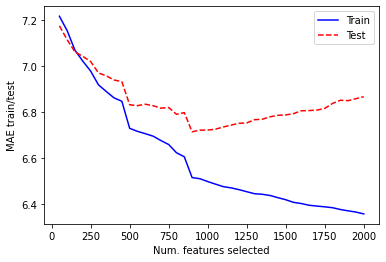

In [90]:
# plotting results 
plt.plot([x[0] for x in to_plot], [x[1] for x in to_plot], 'b', label='Train') 
plt.plot([x[0] for x in to_plot], [x[2] for x in to_plot], 'r--', label='Test') 
plt.xlabel('Num. features selected')
plt.ylabel('MAE train/test') 
plt.legend(loc=0) 
plt.show()

In [91]:
# 900

# Questão 5 - 
Por que é importante normalizar os dados em uma regressão linear.?

In [93]:
# Ao normalizar os dados, a questão de ordem de grandeza das variáveis não influenciam o modelo.

# Questão 6 
- Em projetos de dados, é recomendável validar os dados e investigar de fato o modelo conseguirá atender as expectativas da solução proposta. Quais dos itens/procedimentos/técnicas abaixo ajudam na melhora desse processo da acurácia de modelos de regressão NÃO linear ?

In [94]:
# Transformações de variáveis, Normalização e Feature engineering.

# Questão 7 
Em modelos não lineares os dados são ajustados por diversas aproximações, esses tipos de modelos ajudam na tomada de decisão em alguns casos. Como podemos resolver um problema de regressão não linear? Considere as afirmações a seguir e responda: Como podemos resolver um problema de regressão não linear? \
    I - Com a otimização dos hiperparâmetros de um modelo Regressão Linear da scikit-learn \
    II - Com um modelo Regressão Linear junto a combinações não lineares das features do dataset \
    III - Aplicando somente um modelo não linear \
    IV - Com uma seleção de features adequada antes de passar por um modelo Ridge com regularização \
As afirmações corretas são:

In [95]:
#II e IV